![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# QUESTION: What is the average birthweight for babies in USA?
# We will try to answer this question in this notebook while learining EDA principles.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# 1 - DataFrames and Series

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nsfg = pd.read_hdf("nsfg.hdf5","nsfg")

In [3]:
type(nsfg)

pandas.core.frame.DataFrame

In [4]:
nsfg.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


In [7]:
nsfg.shape

(9358, 10)

In [8]:
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

In [9]:
pounds = nsfg["birthwgt_lb1"]

It is another pandas data structure.

In [10]:
type(pounds)

pandas.core.series.Series

In [11]:
pounds.head()

0    5.0
1    4.0
2    5.0
3    NaN
4    8.0
Name: birthwgt_lb1, dtype: float64

# Exploring the NSFG data

To get the number of rows and columns in a DataFrame, you can read its shape attribute.

To get the column names, you can read the columns attribute. The result is an Index, which is a Pandas data structure that is similar to a list. 

# Display the number of rows and columns

In [12]:
nsfg.shape

(9358, 10)

# Display the names of the columns

In [13]:
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

# Select column birthwgt_oz1: ounces

In [14]:
ounces = nsfg["birthwgt_oz1"]

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# 2 - Clean and Validate

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [17]:
pounds.value_counts().sort_index()

0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
98.0       1
99.0      94
Name: birthwgt_lb1, dtype: int64

There is a 98 and 99 punds, which are incorrect.

In [18]:
pounds.describe()

count    6485.000000
mean        8.055204
std        11.178893
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        99.000000
Name: birthwgt_lb1, dtype: float64

Due to the 98 and 99 pounds describe methods mean does not make any sense. Be careful.

In [21]:
pounds = pounds.replace([98,99], np.nan)

In [22]:
pounds.mean()

6.703286384976526

In [23]:
pounds.describe()

count    6390.000000
mean        6.703286
std         1.429265
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        17.000000
Name: birthwgt_lb1, dtype: float64

If you use inplace true, yo do not need to make it assign again.

In [24]:
ounces.replace([98,99],np.nan,inplace=True)

In [26]:
birth_weight = pounds + ounces / 16

In [27]:
birth_weight.describe()

count    6355.000000
mean        7.120978
std         1.422236
min         0.000000
25%         6.375000
50%         7.187500
75%         8.000000
max        17.937500
dtype: float64

# How many pregnancies in this dataset ended with a live birth?

In [29]:
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

__nbrnaliv__

value - label
- 1 -	Live birth
- 2 -	Induced abortion
- 3 -	Stillbirth
- 4 -	Miscarriage
- 5 -	Ectopic pregnancy
- 6 -	Current pregnancy

In [31]:
nsfg.nbrnaliv.value_counts().sort_values()

8.0       1
3.0       5
2.0     100
1.0    6379
Name: nbrnaliv, dtype: int64

## Answer is 6379

# Replace the value 8 with NaN

In [35]:
nsfg["nbrnaliv"].replace([8],np.nan,inplace=True)

In [36]:
nsfg.nbrnaliv.value_counts().sort_values()

3.0       5
2.0     100
1.0    6379
Name: nbrnaliv, dtype: int64

# Compute a variable

For each pregnancy in the NSFG dataset, the variable 'agecon' encodes the respondent's age at conception, and 'agepreg' the respondent's age at the end of the pregnancy.

Both variables are recorded as integers with two implicit decimal places, so the value 2575 means that the respondent's age was 25.75.

In [37]:
agecon = nsfg.agecon / 100
agepreg = nsfg.agepreg / 100

# Compute the difference

In [41]:
preg_length = agepreg - agecon

In [42]:
preg_length

0       0.75
1       0.67
2       0.67
3        NaN
4       0.75
        ... 
9353    0.67
9354    0.75
9355    0.67
9356    0.75
9357    0.75
Length: 9358, dtype: float64

In [43]:
preg_length.describe()

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# 3 - Filter and visualize

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [49]:
birth_weight.isna().sum()

3003

There are many Nan Values.

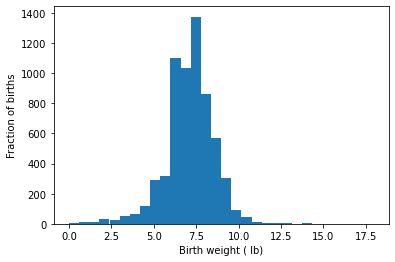

In [57]:
plt.hist(birth_weight.dropna(), bins=30)
plt.xlabel("Birth weight ( lb)")
plt.ylabel("Fraction of births")
plt.show()

## Boolean Series

In [58]:
preterm = nsfg["prglngth"] < 37
preterm.head()

0    False
1     True
2     True
3     True
4    False
Name: prglngth, dtype: bool

In [60]:
preterm.sum() # True accepted as 1 and False accepted as 0

3742

In [61]:
preterm.mean()

0.39987176747168196

# We can use BOOLEAN Series as FILTER

In [64]:
preterm_weight = birth_weight[preterm]
preterm_weight.mean()

5.577598314606742

In [66]:
full_term_weight = birth_weight[-preterm]
full_term_weight.mean()

7.372323879231473

# Make a histogram

## Plot a histogram of agecon with 20 bins.

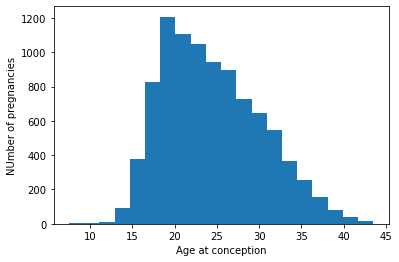

In [67]:
plt.hist(agecon, bins=20)

plt.xlabel("Age at conception")
plt.ylabel("NUmber of pregnancies")

plt.show()

 Use the variable 'nbrnaliv' to make a Boolean Series that is True for single births (where 'nbrnaliv' equals 1) and False otherwise.

In [68]:
single = nsfg["nbrnaliv"] == 1

# Compute birth weight for single full-term babies

In [70]:
birth_weight

0       5.2500
1       4.7500
2       5.2500
3          NaN
4       8.8125
         ...  
9353    4.6875
9354    8.4375
9355    7.3750
9356    8.1875
9357    8.3125
Length: 9358, dtype: float64

# Filter full-term babies

In [71]:
full_term = nsfg["prglngth"] >= 37

In [82]:
full_term.shape

(9358,)

# Filter single births

In [72]:
single = nsfg["nbrnaliv"] == 1

In [83]:
single.shape

(9358,)

In [81]:
birth_weight.shape

(9358,)

# Compute birth weight for single full-term babies

In [74]:
single_full_term_weight = birth_weight[full_term & single]
single_full_term_weight.mean()

7.385643450184502

# Compute birth weight for multiple full-term babies

In [77]:
mult_full_term_weight = birth_weight[full_term & ~single]
mult_full_term_weight.mean()

5.768055555555556

## ANSWER of section question, average birthweight for babies in USA as above.